In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [32]:
connections, devices, processes, profiles = pd.read_csv('data/connections.csv', sep='\t', keep_default_na=False), pd.read_csv('data/devices.csv', sep='\t', keep_default_na=False), pd.read_csv('data/processes.csv', sep='\t', keep_default_na=False), pd.read_csv('data/profiles.csv', sep='\t', keep_default_na=False)

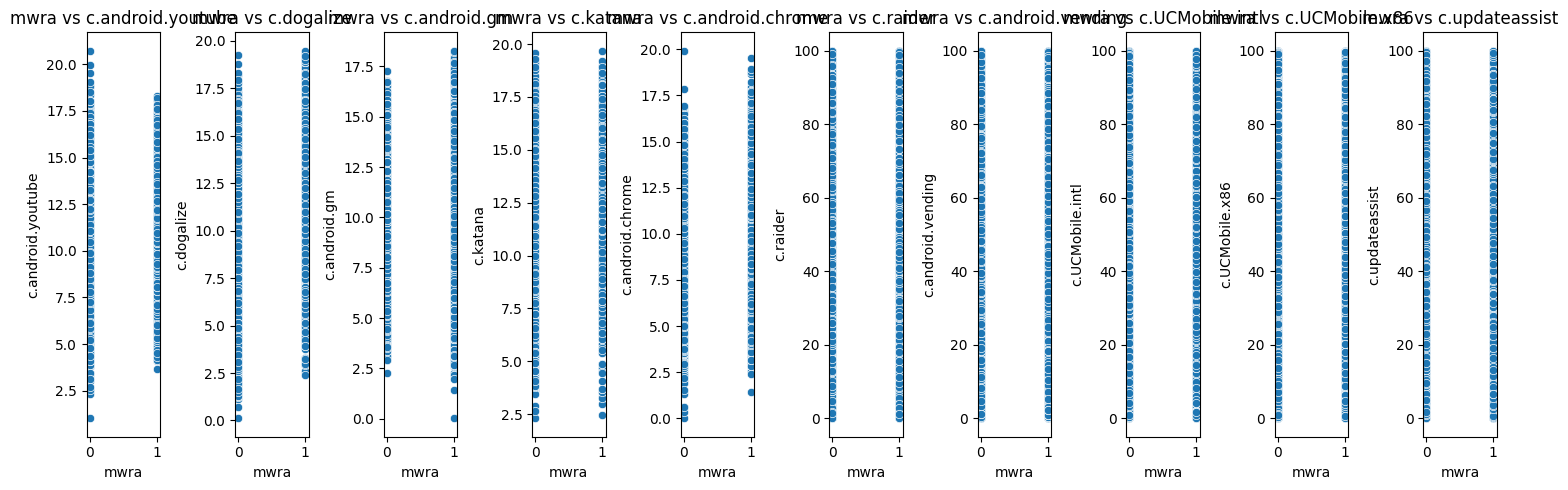

In [33]:
column_mwra = connections.iloc[:, 2]
column_mwra_name = connections.columns[2]

columns_after_mwra = connections.iloc[:, 3:]

fig, axes = plt.subplots(1, len(columns_after_mwra.columns), figsize=(15, 5))

for i, col in enumerate(columns_after_mwra.columns):
    sns.scatterplot(x=column_mwra, y=connections[col], ax=axes[i])
    axes[i].set_title(f'{column_mwra_name} vs {col}')
    axes[i].set_xlabel(column_mwra_name)
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

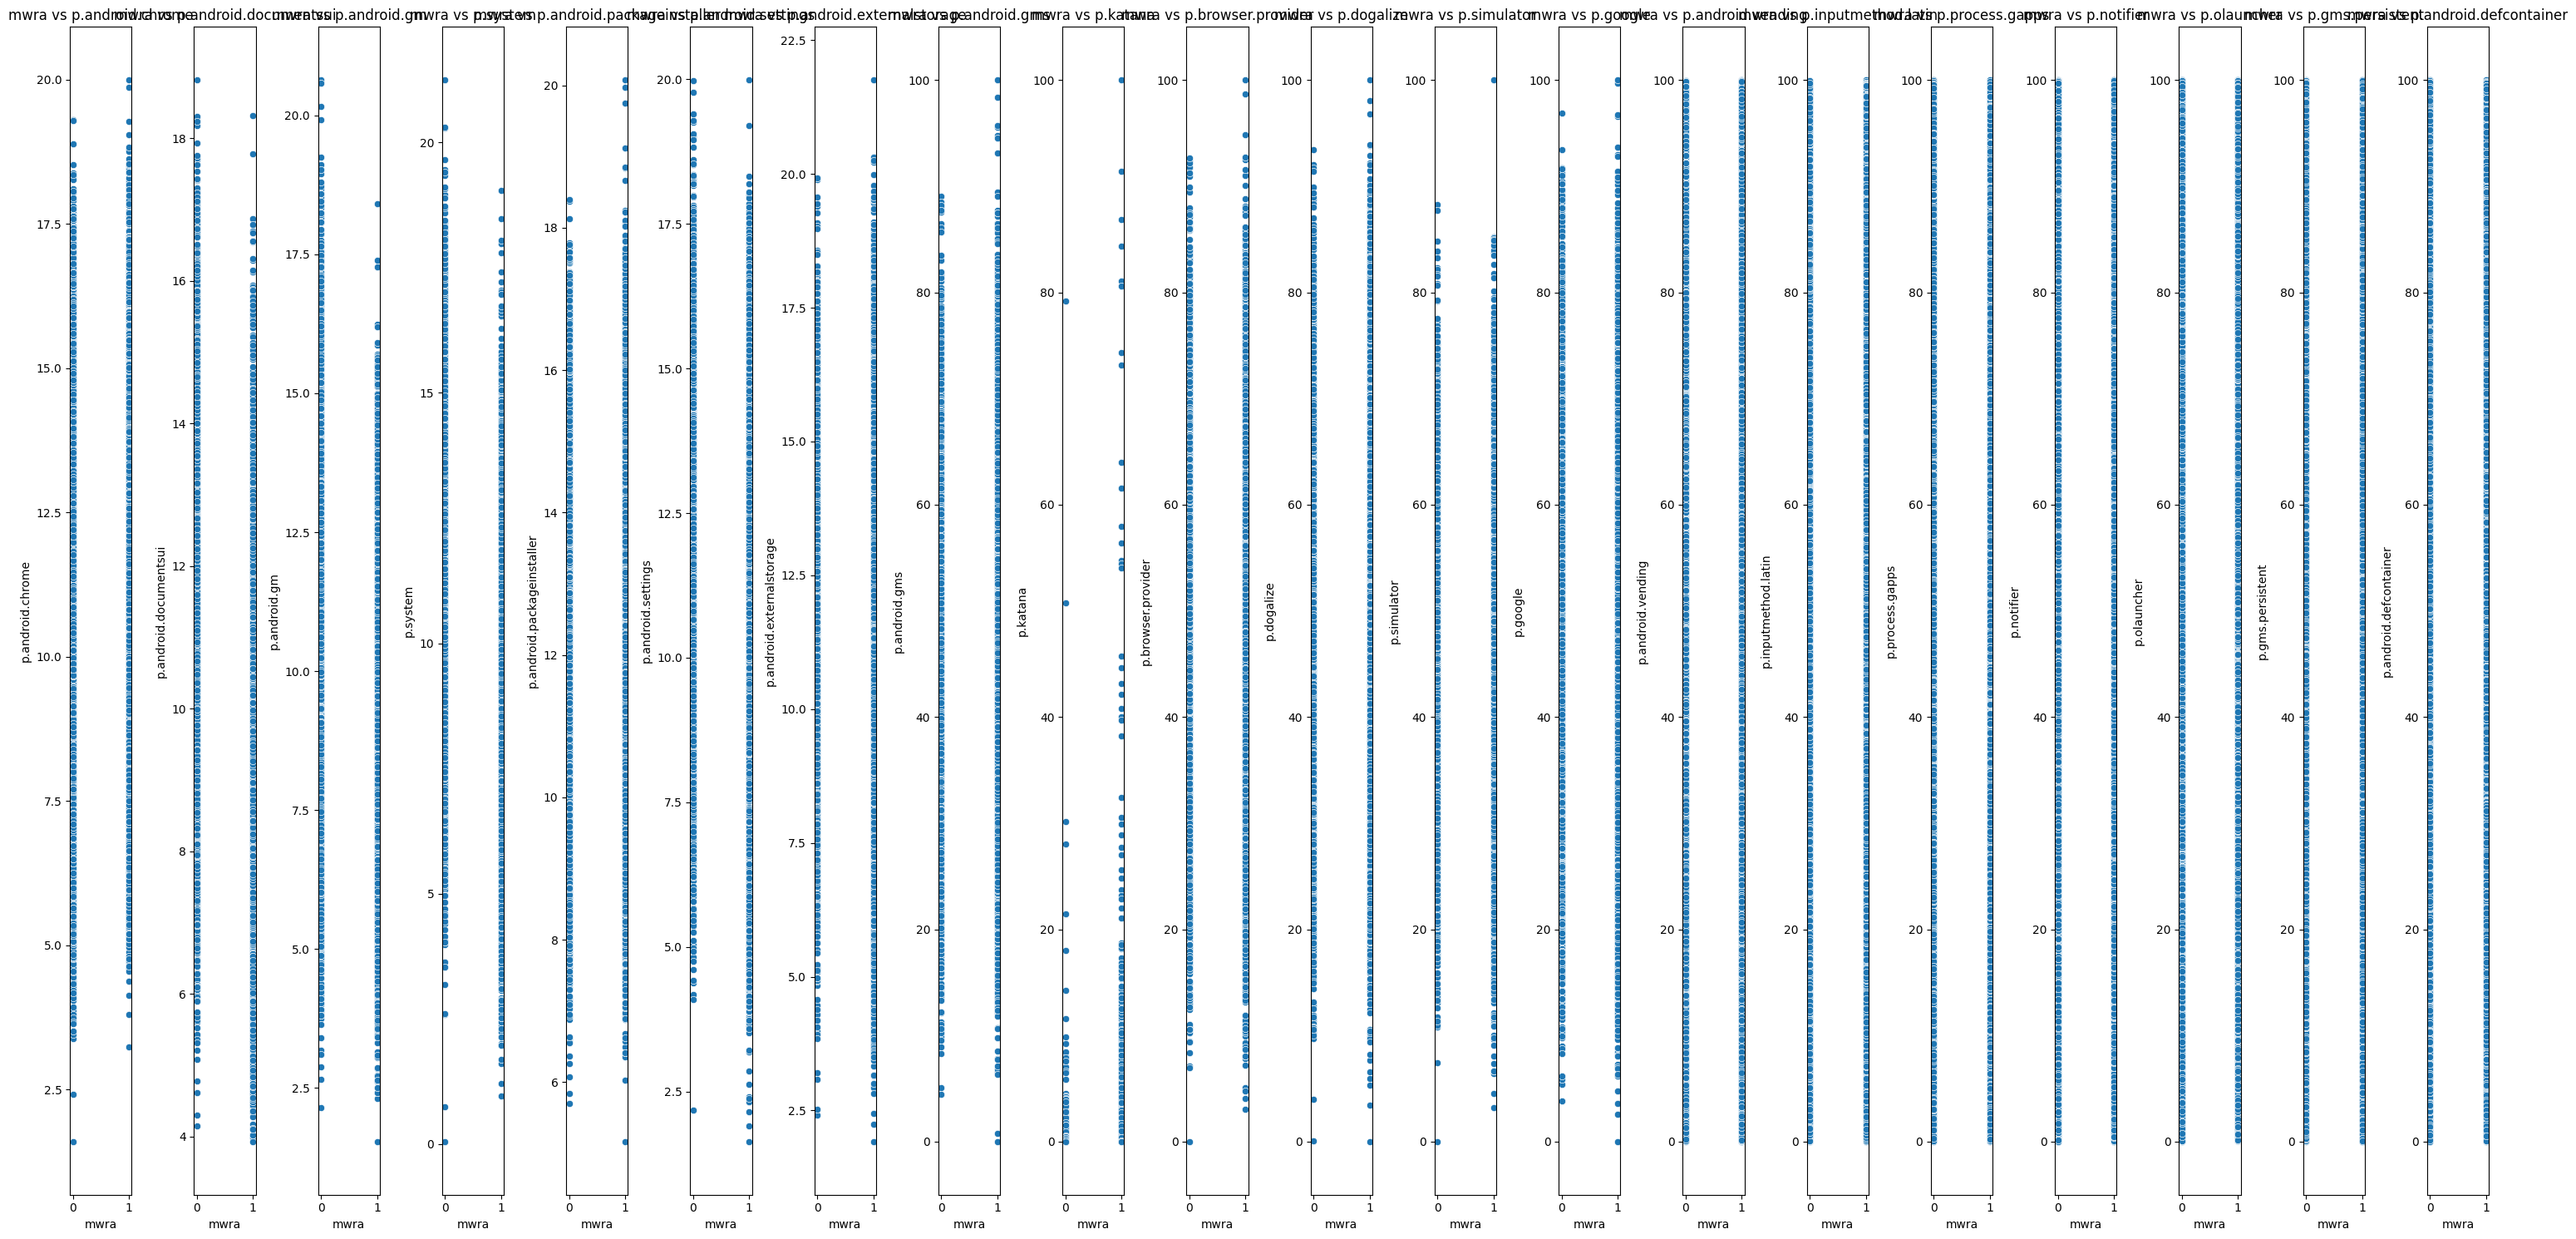

In [34]:
column_mwra = processes.iloc[:, 2]
column_mwra_name = processes.columns[2]

columns_after_mwra = processes.iloc[:, 3:]

fig, axes = plt.subplots(1, len(columns_after_mwra.columns), figsize=(30, 15))

for i, col in enumerate(columns_after_mwra.columns):
    sns.scatterplot(x=column_mwra, y=processes[col], ax=axes[i])
    axes[i].set_title(f'{column_mwra_name} vs {col}')
    axes[i].set_xlabel(column_mwra_name)
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

The greatest potential for machine learning seems to be the attribute "p.katana" from the processes table, as it has areas with a value of 1 and areas with a value of 0. The other attributes are evenly distributed, and there is no obvious dependency.

## Connections

### Pair analysis with discrete data

In [35]:
connections.corr(numeric_only=True)

,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.raider,c.android.vending,c.UCMobile.intl,c.UCMobile.x86,c.updateassist
imei,1.000000,0.006474,0.017566,0.006737,0.001825,-0.001389,0.007748,-0.002585,-0.002035,-0.021353,-0.004861,-0.011352
mwra,0.006474,1.000000,-0.004140,0.522570,0.275657,0.306074,0.268251,0.013537,-0.008523,0.006235,0.006907,-0.006282
c.android.youtube,0.017566,-0.004140,1.000000,0.097767,-0.421590,-0.300992,0.257843,0.013026,-0.008221,0.006554,0.009581,-0.000843
c.dogalize,0.006737,0.522570,0.097767,1.000000,0.213433,0.274545,0.042080,0.003519,-0.010887,0.006456,0.012920,-0.001384
c.android.gm,0.001825,0.275657,-0.421590,0.213433,1.000000,0.279629,-0.256611,0.000494,-0.005557,0.010355,-0.000441,-0.009716
c.katana,-0.001389,0.306074,-0.300992,0.274545,0.279629,1.000000,0.137779,-0.003772,0.001509,0.004389,0.007634,0.003938
c.android.chrome,0.007748,0.268251,0.257843,0.042080,-0.256611,0.137779,1.000000,0.002464,-0.001247,-0.010564,-0.003832,-0.001455
c.raider,-0.002585,0.013537,0.013026,0.003519,0.000494,-0.003772,0.002464,1.000000,0.001257,0.000711,-0.010063,0.005138
c.android.vending,-0.002035,-0.008523,-0.008221,-0.010887,-0.005557,0.001509,-0.001247,0.001257,1.000000,0.003102,0.005264,-0.018770
c.UCMobile.intl,-0.021353,0.006235,0.006554,0.006456,0.010355,0.004389,-0.010564,0.000711,0.003102,1.000000,0.006946,0.009385


The highest correlation with the "mwra" column is shown by the column "c.dogalize" with a value of approximately 0.52. A correlation of this value suggests that there is a moderate positive relationship between the two variables. This means that as one variable increases, the other variable tends to increase as well, but the relationship is not strong enough to be classified as a perfect correlation.

<Axes: >

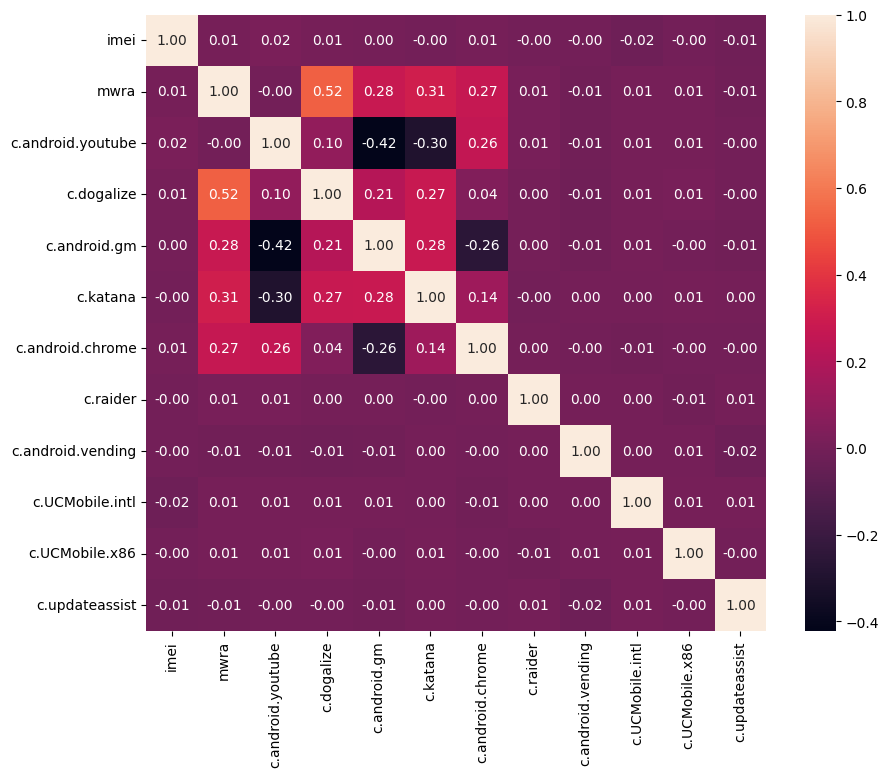

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(connections.corr(numeric_only=True), ax=ax, annot=True, fmt=".2f")

<Axes: xlabel='mwra', ylabel='c.dogalize'>

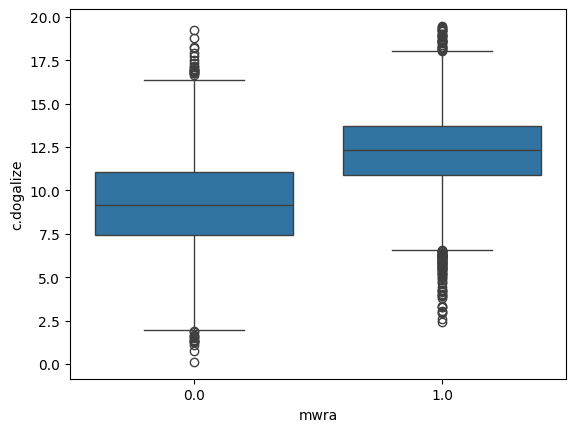

In [37]:
sns.boxplot(x='mwra', y='c.dogalize', data=connections)

### Pair analysis with categorical data

**MWRA & TS**

We will begin by creating a contingency table, which will provide us with an overview of the relationship between mwra and ts. The contingency table will display the counts of occurrences for combinations of values from both attributes, which is useful for identifying potential associations.

In [43]:
contingency_table = pd.crosstab(connections['mwra'], connections['ts'])
contingency_table

ts,2018-05-05 10:00:00,2018-05-05 10:01:00,2018-05-05 10:02:00,2018-05-05 10:03:00,2018-05-05 10:04:00,2018-05-05 10:05:00,2018-05-05 10:06:00,2018-05-05 10:07:00,2018-05-05 10:08:00,2018-05-05 10:09:00,...,2018-05-15 18:05:00,2018-05-15 18:06:00,2018-05-15 18:07:00,2018-05-15 18:08:00,2018-05-15 18:09:00,2018-05-15 18:10:00,2018-05-15 18:11:00,2018-05-15 18:12:00,2018-05-15 18:13:00,2018-05-15 18:14:00
mwra,,,,,,,,,,,,,,,,,,,,,
0.0,1,0,1,0,0,0,1,1,0,1,...,0,1,1,0,0,1,0,0,1,1
1.0,0,1,0,1,1,1,0,0,1,0,...,1,0,0,1,1,0,1,1,0,0


In [44]:
connections["ts"].value_counts()

ts
2018-05-05 19:22:00    2
2018-05-12 00:34:00    2
2018-05-12 00:36:00    2
2018-05-15 15:18:00    2
2018-05-06 15:38:00    2
                      ..
2018-05-08 21:14:00    1
2018-05-08 21:15:00    1
2018-05-08 21:16:00    1
2018-05-08 21:17:00    1
2018-05-15 18:14:00    1
Name: count, Length: 14895, dtype: int64

In [48]:
connections["ts"].size

15074

Creating a contingency table in this case probably does not make sense, as ts represents a timestamp. Timestamps consist of a vast number of unique values (14895 out of 15074), making the results convoluted and the contingency table difficult to interpret. Instead we can try visualize these data using heatmap.

<Axes: xlabel='ts', ylabel='mwra'>

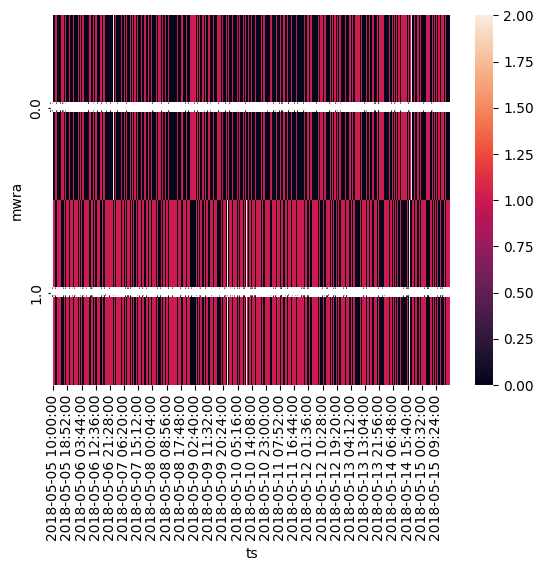

In [49]:
sns.heatmap(contingency_table, annot=True, fmt="d")

This heatmap does not show any correlation in data, so now let's try visualizating with barplot.

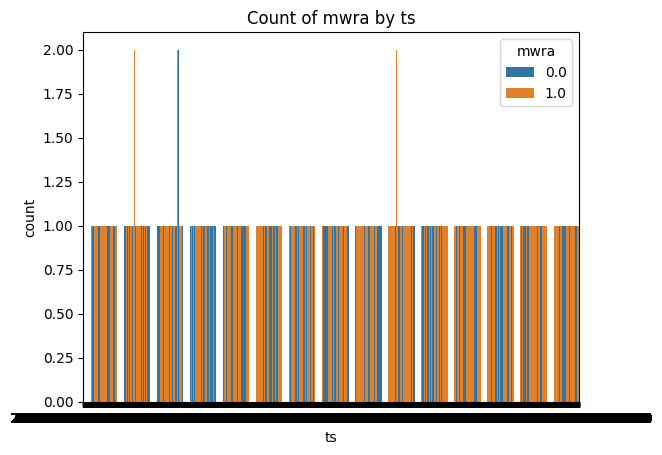

In [73]:
sns.countplot(data=connections, x='ts', hue='mwra')
plt.title('Count of mwra by ts')
plt.legend(title='mwra')
plt.show()

This bar plot indicates that some records are reported twice within one second, but the majority of cases had unique timestamps. Therefore, we will try to prove a correlation using the chi-squared test.

In [55]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 15073.999999999998
P-value: 0.14856475259497845


Despite the high chi-squared statistic indicating that the observed counts differ a lot from expected counts, the p-value suggests that this difference is not statistically significant at the usual threshold (0.05). Therefore, there is not enough evidence to conclude that there is a statistically significant association between the two categorical variables you are analyzing.

**MWRA & IMEI**

Now we will create a contingency table, which will provide us with an overview of the relationship between mwra and imei.

In [56]:
contingency_table = pd.crosstab(connections['mwra'], connections['imei'])
contingency_table

imei,359043379931766007,359043379931766015,359043379931766023,359043379931766031,359043379931766049,359043379931766056,359043379931766064,359043379931766072,359043379931766080,359043379931766098,...,8630330696303482402,8630330696303482410,8630330696303482428,8630330696303482436,8630330696303482444,8630330696303482451,8630330696303482469,8630330696303482477,8630330696303482485,8630330696303482493
mwra,,,,,,,,,,,,,,,,,,,,,
0.0,7,12,12,13,7,14,12,9,10,8,...,17,12,11,8,11,17,5,13,12,12
1.0,17,17,21,16,16,18,16,25,10,18,...,15,27,18,21,16,15,19,15,20,24


Contincency table for imei seems better for determining correlation with mwra because is shows higher frequency counts for each combination of mwra and imei values, has fewer unique values and is better for chi-squared test, since they require a sufficient number of observations within each category to produce meaningful results. 

Imei 359043379931766007 shows 7 occurrences of mwra = 0.0 and 17 occurrences of mwra = 1.0. Imei 359043379931766056 has 14 occurrences for mwra = 0.0 and 18 occurrences for mwra = 1.0. This variability suggests that certain devices are more likely to have one mwra state over another, which could indicate a potential association between specific imei values and mwra statuses. Now we will try to visualize the correlation using heatmap.

<Axes: xlabel='imei', ylabel='mwra'>

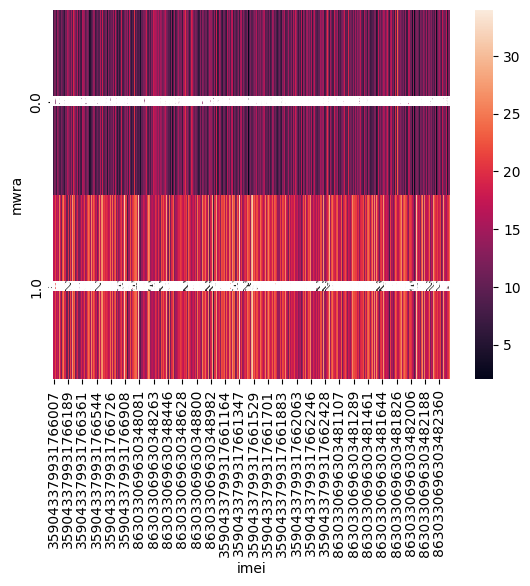

In [57]:
sns.heatmap(contingency_table, annot=True, fmt="d")

The heatmap didnt help with the visualization of the correlation so we will try to visualize it using barplot. 

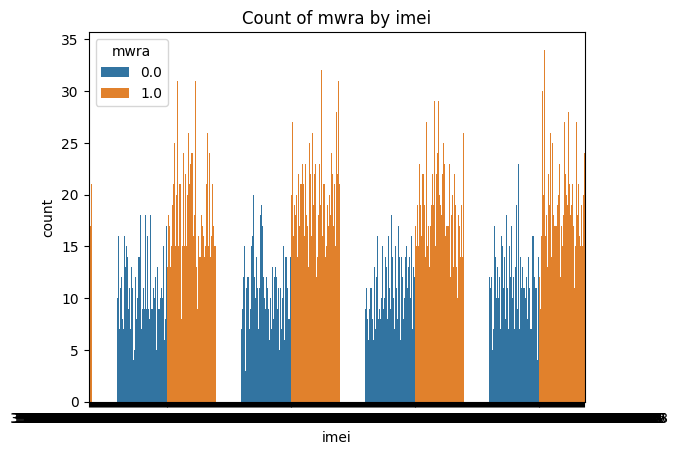

In [61]:
sns.countplot(data=connections, x='imei', hue='mwra')
plt.title('Count of mwra by imei')
plt.legend(title='mwra')
plt.show()

This barplot indicates that there might be a correlation so we will try to confirm this suspicion using chi-squared test.

In [62]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 512.9443003121341
P-value: 0.32332909769926393


Although the chi-squared statistic is relatively high, suggesting that there may be a noticeable difference in the observed versus expected frequencies, the p-value indicates that this difference is not statistically significant. This means that we do not have sufficient evidence to say there is a real association between the variables. Any observed differences in the data could be attributed to random chance.

## Processes

### Pair analysis with discrete data

In [38]:
processes.corr(numeric_only=True)

,imei,mwra,p.android.chrome,p.android.documentsui,p.android.gm,p.system,p.android.packageinstaller,p.android.settings,p.android.externalstorage,p.android.gms,...,p.dogalize,p.simulator,p.google,p.android.vending,p.inputmethod.latin,p.process.gapps,p.notifier,p.olauncher,p.gms.persistent,p.android.defcontainer
imei,1.000000,0.006474,-0.001510,0.002877,-0.014299,-0.003497,-0.007890,0.009453,0.003195,0.001174,...,-0.003058,0.009357,-0.008635,0.009809,-0.000891,0.006044,-0.012947,-0.001758,-0.006087,-0.008045
mwra,0.006474,1.000000,0.008965,-0.606647,-0.308376,-0.538718,-0.004945,-0.281274,-0.256214,-0.014687,...,0.005421,0.005955,-0.002580,-0.010653,0.012006,0.001473,-0.000081,0.004095,-0.001284,0.011177
p.android.chrome,-0.001510,0.008965,1.000000,0.092605,-0.142825,0.107323,-0.053750,-0.319664,-0.460702,0.002020,...,-0.019596,0.003181,-0.000285,0.005803,0.003555,-0.003331,0.000164,0.012680,-0.013641,0.014438
p.android.documentsui,0.002877,-0.606647,0.092605,1.000000,0.284195,0.367432,-0.044438,0.186383,0.349029,0.002251,...,-0.013409,-0.003067,-0.008564,0.007553,-0.007125,-0.008410,0.006735,0.005227,-0.011289,-0.000301
p.android.gm,-0.014299,-0.308376,-0.142825,0.284195,1.000000,0.216030,0.084486,0.088121,0.223952,0.007772,...,0.009158,-0.004271,-0.006233,-0.006106,-0.013816,-0.009139,0.004707,-0.010127,0.002990,-0.001038
p.system,-0.003497,-0.538718,0.107323,0.367432,0.216030,1.000000,0.091450,0.316435,0.153111,0.000045,...,-0.002051,0.005221,-0.005040,0.007021,-0.007232,-0.013476,0.011425,-0.003141,-0.010407,-0.002573
p.android.packageinstaller,-0.007890,-0.004945,-0.053750,-0.044438,0.084486,0.091450,1.000000,0.045652,-0.035798,0.013746,...,-0.003735,-0.001432,-0.001099,-0.004906,0.010038,0.019666,0.000689,-0.008751,0.008549,-0.012846
p.android.settings,0.009453,-0.281274,-0.319664,0.186383,0.088121,0.316435,0.045652,1.000000,0.317785,-0.002056,...,0.000677,0.008325,0.003228,0.013794,-0.009766,-0.000961,-0.004986,-0.010751,0.006667,-0.008530
p.android.externalstorage,0.003195,-0.256214,-0.460702,0.349029,0.223952,0.153111,-0.035798,0.317785,1.000000,0.011578,...,0.001171,-0.005689,-0.002320,0.011951,-0.008156,0.010981,0.003064,-0.007063,-0.001561,-0.004237
p.android.gms,0.001174,-0.014687,0.002020,0.002251,0.007772,0.000045,0.013746,-0.002056,0.011578,1.000000,...,-0.001431,-0.002073,-0.002802,-0.017875,0.016467,0.019376,-0.001657,-0.013423,-0.005371,-0.002496


The highest correlation with the "mwra" column is shown by the columns "p.android.documentsui" (with a value of approximately -0.61) and "p.system" (with a value of approximately -0.54). These negative correlation values indicate that as the "mwra" values increase, the values in "p.android.documentsui" and "p.system" tend to decrease. This suggests an inverse relationship, meaning that higher "mwra" values are associated with lower usage or performance in these attributes.

<Axes: >

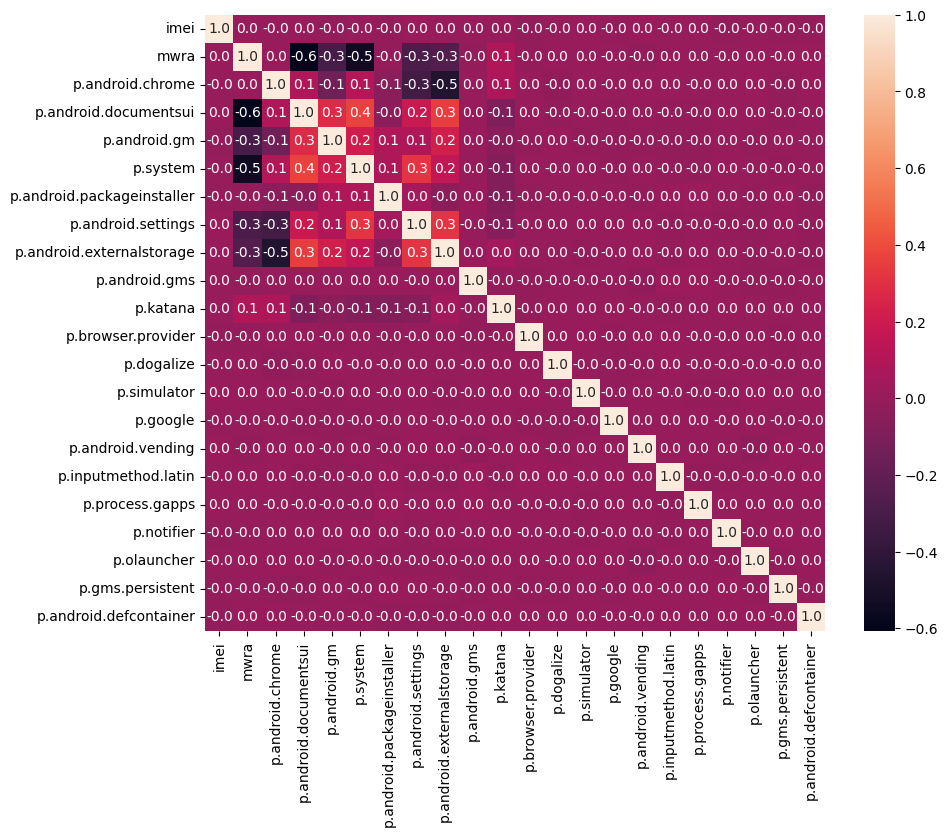

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(processes.corr(numeric_only=True), ax=ax, annot=True, fmt=".1f")

<Axes: xlabel='mwra', ylabel='p.android.documentsui'>

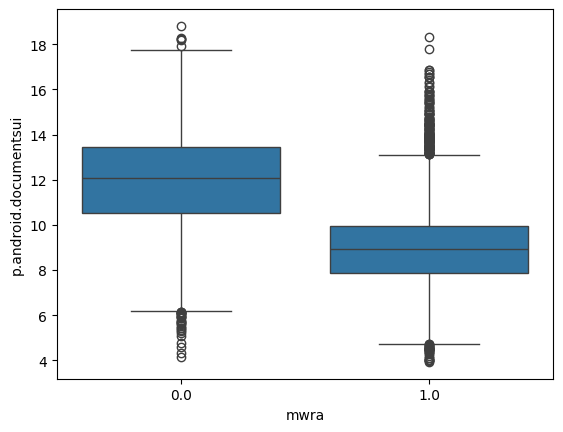

In [40]:
sns.boxplot(x='mwra', y='p.android.documentsui', data=processes)

The boxplot visually confirms the negative relationship between p.android.documentsui and mwra. As mwra changes from 0 to 1, the values of p.android.documentsui decrease, supporting the previously observed negative correlation.

<Axes: xlabel='mwra', ylabel='p.system'>

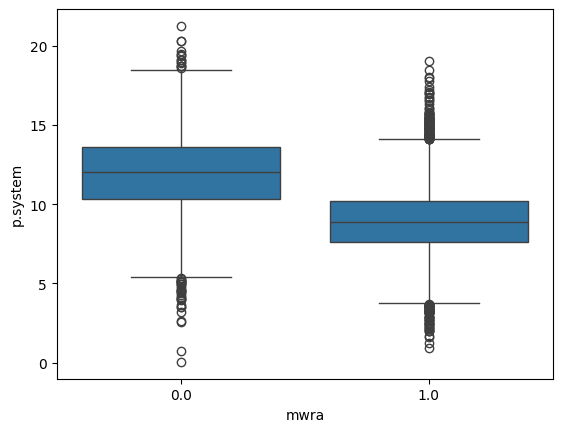

In [41]:
sns.boxplot(x='mwra', y='p.system', data=processes)

This boxplot illustrates the negative relationship between p.system and mwra, where p.system values are higher when mwra is 0 and lower when mwra is 1, consistent with the previously identified negative correlation.

### Pair analysis with categorical data

**MWRA & TS**

To gain insight into the relationship between mwra and ts in processes table, we will first create a contingency table.

In [66]:
contingency_table = pd.crosstab(processes['mwra'], processes['ts'])
contingency_table

ts,2018-05-05 10:00:00,2018-05-05 10:01:00,2018-05-05 10:02:00,2018-05-05 10:03:00,2018-05-05 10:04:00,2018-05-05 10:05:00,2018-05-05 10:06:00,2018-05-05 10:07:00,2018-05-05 10:08:00,2018-05-05 10:09:00,...,2018-05-15 18:05:00,2018-05-15 18:06:00,2018-05-15 18:07:00,2018-05-15 18:08:00,2018-05-15 18:09:00,2018-05-15 18:10:00,2018-05-15 18:11:00,2018-05-15 18:12:00,2018-05-15 18:13:00,2018-05-15 18:14:00
mwra,,,,,,,,,,,,,,,,,,,,,
0.0,1,0,1,0,0,0,1,1,0,1,...,0,1,1,0,0,1,0,0,1,1
1.0,0,1,0,1,1,1,0,0,1,0,...,1,0,0,1,1,0,1,1,0,0


In [68]:
processes["ts"].value_counts()

ts
2018-05-05 19:22:00    2
2018-05-12 00:34:00    2
2018-05-12 00:36:00    2
2018-05-15 15:18:00    2
2018-05-06 15:38:00    2
                      ..
2018-05-08 21:14:00    1
2018-05-08 21:15:00    1
2018-05-08 21:16:00    1
2018-05-08 21:17:00    1
2018-05-15 18:14:00    1
Name: count, Length: 14895, dtype: int64

In [69]:
processes["ts"].size

15074

Creating a contingency table in this case again probably does not make sense, as ts consist of majority of unique values (14895 out of 15074), making the results complex,  and interpreting the contingency table proves to be difficult. We can again try to visualize these data using heatmap. The results seem to be the same as in the connections table, so we can try to visualize them using heatmap to observe it this similarity continues.

<Axes: xlabel='ts', ylabel='mwra'>

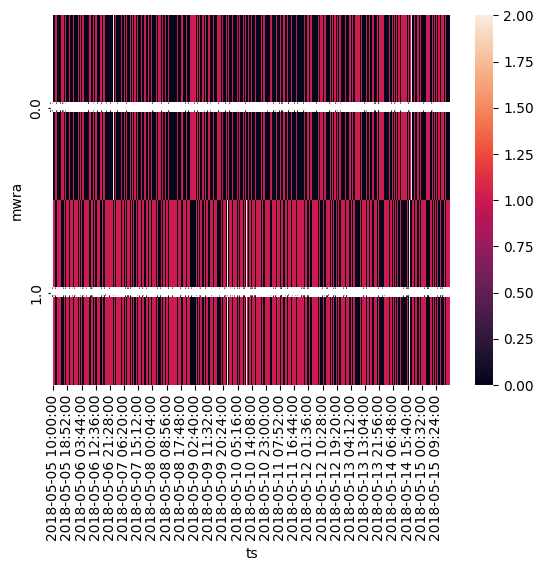

In [72]:
sns.heatmap(contingency_table, annot=True, fmt="d")

The heatmap has the same results as the one in connections table and does not show any visible sorrelation, so now we can try visualization using barplot.

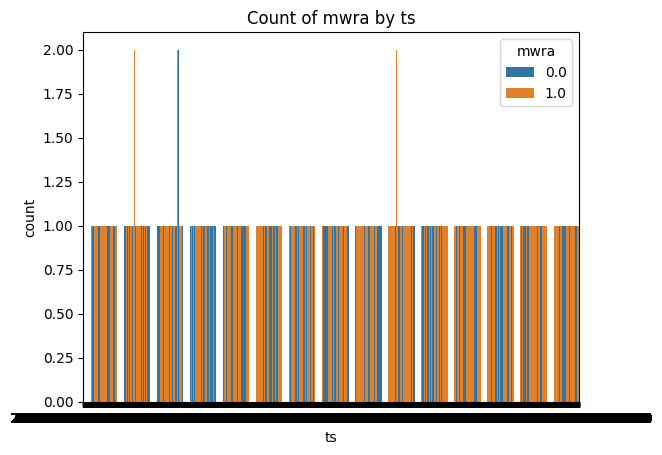

In [74]:
sns.countplot(data=processes, x='ts', hue='mwra')
plt.title('Count of mwra by ts')
plt.legend(title='mwra')
plt.show()

The barplot also has the same form as the one in connections table indicationg that some records are reported twice within one second, but the majority of cases had unique timestamps. Now we will check if the chi-squared test has also the same results as the chi-squered test for ts and mwra in connections table. 

In [71]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 15073.999999999998
P-value: 0.14856475259497845


The chi-squared test has the same results, so we again fail to reject the null hypothesis. Since all results were the same as results for mwra and ts in connections table, we might want to check, whether these data are also equal.

In [ ]:
timestamps = {
    'connections': pd.to_datetime(connections['ts']), 
    'processes': pd.to_datetime(processes['ts'])
}
timestamps['connections'].equals(timestamps['processes'])

We verified that timestamps in these two tables match. This indicates taht each report was created synchronously for processes and connection at the same time. Therefore, these two tables can be merged into one table.

**MWRA & IMEI**

Now we will create a contingency table for mwra and imei from processes table, which will provide us with an overview of the relationship between them.

In [75]:
contingency_table = pd.crosstab(connections['mwra'], connections['imei'])
contingency_table

imei,359043379931766007,359043379931766015,359043379931766023,359043379931766031,359043379931766049,359043379931766056,359043379931766064,359043379931766072,359043379931766080,359043379931766098,...,8630330696303482402,8630330696303482410,8630330696303482428,8630330696303482436,8630330696303482444,8630330696303482451,8630330696303482469,8630330696303482477,8630330696303482485,8630330696303482493
mwra,,,,,,,,,,,,,,,,,,,,,
0.0,7,12,12,13,7,14,12,9,10,8,...,17,12,11,8,11,17,5,13,12,12
1.0,17,17,21,16,16,18,16,25,10,18,...,15,27,18,21,16,15,19,15,20,24


This contingency table for imei seems better for determining correlation with mwra, as well. The variability suggests that certain devices are more likely to have one mwra state over another, which could indicate a potential association between specific imei values and mwra statuses. This table seems to have the same data as the one in connections table. Now we can try to visualize the correlation using heatmap.

<Axes: xlabel='imei', ylabel='mwra'>

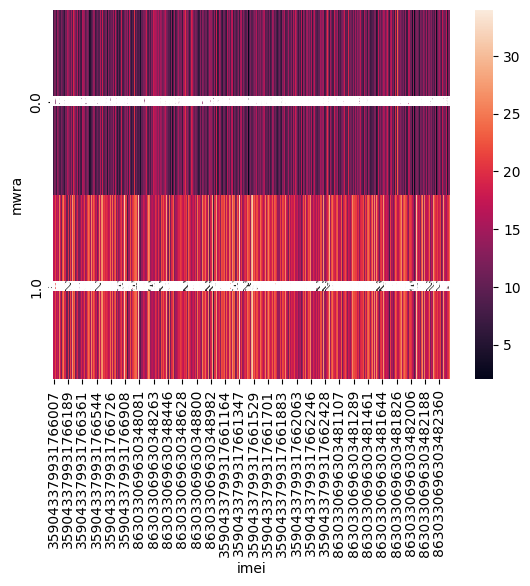

In [76]:
sns.heatmap(contingency_table, annot=True, fmt="d")

The heatmap did not help again and seems the same as the one in connections table. We can again try to visualize it using barplot.

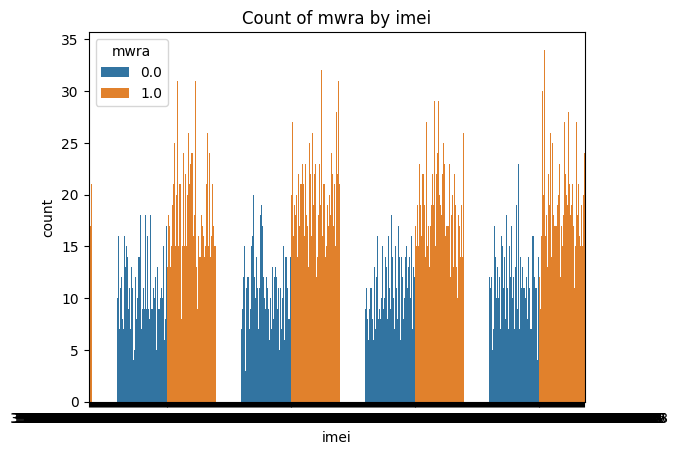

In [77]:
sns.countplot(data=processes, x='imei', hue='mwra')
plt.title('Count of mwra by imei')
plt.legend(title='mwra')
plt.show()

The barplot again indicates a correlation, which we will try confirm using chi-squared test.

In [78]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 512.9443003121341
P-value: 0.32332909769926393


The chi-squared statistic is again relatively high, suggesting that there might be a noticeable difference in the observed versus expected frequencies, however, the p-value indicates that this difference is not statistically significant. This means that we do not have sufficient evidence to say there is a real association between the variables. Any observed differences in the data could be attributed to random chance. We can clearly see that both the test and the visualizations had the same results as the ones in connections table, so now we might want to check whether also these data are equal.

In [79]:
imeis = {
    'connections': pd.to_datetime(connections['imei']), 
    'processes': pd.to_datetime(processes['imei'])
}
imeis['connections'].equals(imeis['processes'])

True

We verified that values in imei column in these two tables match. Therefore, each report was probably created synchronously for processes and connection at the same time for the same imei. 

## 1-1E

Initial analysis showed that some columns in the dataset exhibit signs of correlation.
- In the `connections` table, the columns `p.android.youtube` and `p.android.gm` are correlated.
- In the `devices` table, the correlated columns are `store_name`, `code`, and `location`, as well as the newly created columns `continent` and `country_device_shore`.
- In the `processes` table, the most prominent correlations were observed between `p.android.chrome` and `p.android.externalstorage`, as well as between `p.system` and `p.android.documentsui`.
- In the `profiles` table, all columns are highly dependent.

These correlations were further confirmed by the chi-squared test.

The columns found to correlate with the target variable `mwra` including: `c.dogalize` from the `connections` table, and `p.android.documentsui` and `p.system` from the `processes` table. While comparisons between `mwra` and other categorical attributes suggested possible correlations, the chi-squared test did not confirm them.

For the analysis, it was not necessary to combine records from multiple files. However, given the nature of the data, merging location or profile information could potentially improve machine learning performance. Malware typically begins spreading from a specific country and then propagates further, and certain profile groups may contain users more inclined to downloading this type of software.